In [1]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

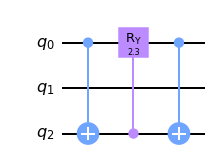

In [2]:
# compressed single
circuit = QuantumCircuit(3)

ind = [0,2]

circuit.cnot(ind[0], ind[1])
circuit.cry(2.3, ind[1], ind[0])
circuit.cnot(ind[0], ind[1])

circuit.draw(output='mpl')

In [3]:
index_pairs = list(range(8))
index_pairs += index_pairs
index_pairs

[0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7]

In [4]:
ind = [0,4,1,7]

In [5]:
index_pairs[(ind[1]+1) : (int(len(index_pairs)/2)+ind[0])]

[5, 6, 7]

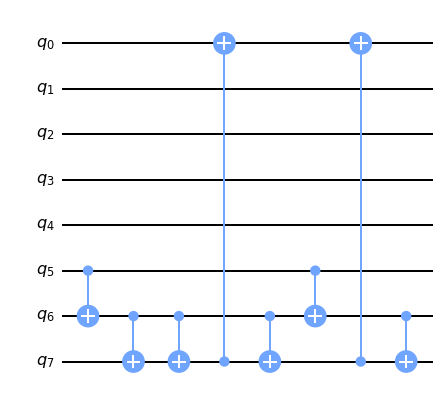

In [6]:
from qiskit.circuit.library import RYGate, MCXGate

# compressed double
circuit = QuantumCircuit(8)


index_pairs = list(range(circuit.num_qubits))
index_pairs += index_pairs
index_pairs

ind = [0,4,1,5]

# pairs for looping cnot ladders
loop_1 = index_pairs[(ind[1]+1) : (int(len(index_pairs)/2)+ind[0])]
loop_2 = index_pairs[(ind[3]+1) : (int(len(index_pairs)/2)+ind[2])]

loop_1_s =  loop_1[1:] + [loop_1[0]]
loop_2_s =  loop_2[1:] + [loop_2[0]]

loop_1 = loop_1[:-1]
loop_1_s = loop_1_s[:-1]

loop_2 = loop_2[:-1]
loop_2_s = loop_2_s[:-1]

# cnot ladder 1
for o, n in zip(loop_1, loop_1_s):
    circuit.cx(o, n)

# cnot ladder 2
for o, n in zip(loop_2, loop_2_s):
    circuit.cx(o, n)

# circuit.cx(ind[0], ind[1])
# circuit.cx(ind[2], ind[3])
# circuit.cx(ind[0], ind[2])


# control1 =  RYGate(2.3).control(3, None, '010')
# circuit.append(control1, [ind[1],ind[2],ind[3],ind[0]])

# circuit.cx(ind[0], ind[2])
# circuit.cx(ind[0], ind[1])
# circuit.cx(ind[2], ind[3])

# cnot ladder 1
for o, n in zip(loop_1[::-1], loop_1_s[::-1]):
    circuit.cx(o, n)

# cnot ladder 2
for o, n in zip(loop_2[::-1], loop_2_s[::-1]):
    circuit.cx(o, n)

circuit.draw(output='mpl')

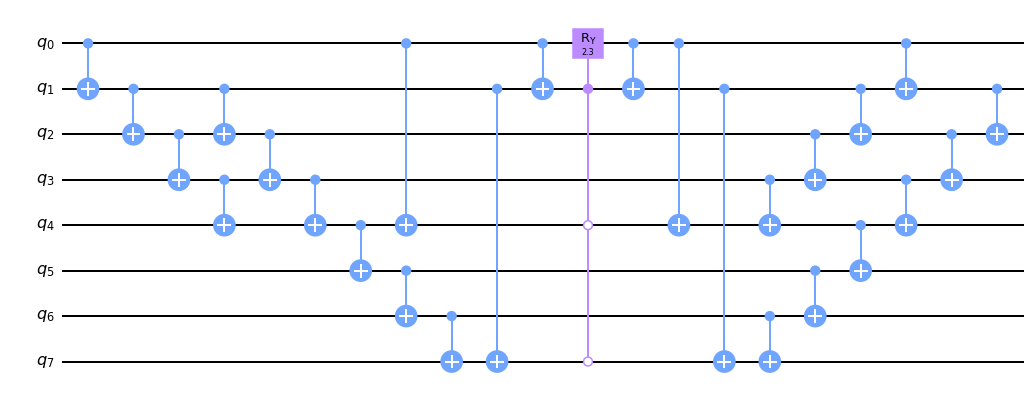

In [7]:
from qiskit.circuit.library import RYGate, MCXGate

# compressed double
circuit = QuantumCircuit(8)


ind = [0,4,1,7]

# cnot ladder 1
for o in range(ind[0], ind[1]):
    circuit.cx(o, o+1)

# cnot ladder 2
for o in range(ind[2], ind[3]):
    circuit.cx(o, o+1)

circuit.cx(ind[0], ind[1])
circuit.cx(ind[2], ind[3])
circuit.cx(ind[0], ind[2])


control1 =  RYGate(2.3).control(3, None, '010')
circuit.append(control1, [ind[1],ind[2],ind[3],ind[0]])

circuit.cx(ind[0], ind[2])
circuit.cx(ind[0], ind[1])
circuit.cx(ind[2], ind[3])

# cnot ladder 1
for o in range(ind[0], ind[1])[::-1]:
    circuit.cx(o, o+1)

# cnot ladder 2
for o in range(ind[2], ind[3])[::-1]:
    circuit.cx(o, o+1)

circuit.draw(output='mpl')

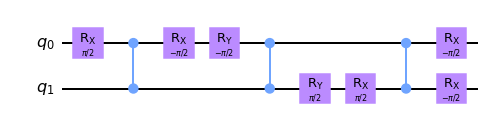

In [8]:
# 2 qubits
qc = QuantumCircuit(2)

# qubit 0
qc.rx(np.pi/2, 0)
qc.cz(0, 1)
qc.rx(-np.pi/2, 0)
qc.ry(-np.pi/2, 0)

# qubit 1
qc.cz(0, 1)
qc.ry(np.pi/2, 1)
qc.rx(np.pi/2, 1)
qc.cz(0, 1)
qc.rx(-np.pi/2, 1)
qc.rx(-np.pi/2, 0)

qc.draw(output='mpl')

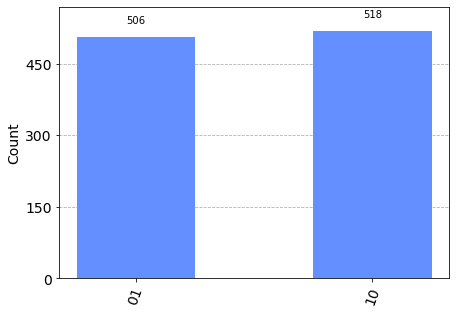

In [9]:
qc.measure_all()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)

In [10]:
from qiskit import QuantumCircuit, Aer, BasicAer
from qiskit.circuit import Parameter


from qiskit.primitives import Estimator, BackendEstimator
from qiskit_aer.primitives import Estimator as AerEstimator

from qiskit_aer import noise, AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeVigo

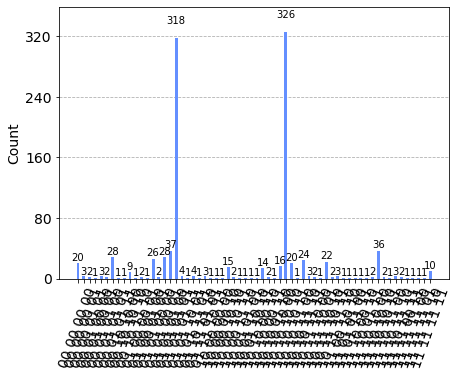

In [13]:
qc.measure_all()

device = FakeVigo()
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device)


# Transpile for simulator
simulator = AerSimulator(noise_model=noise_model)
circ = transpile(qc, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)